In [1]:
import requests

In [2]:
NAVER_STOCK_URL = "https://m.stock.naver.com/domestic/index/KOSPI/total"

In [7]:
from bs4 import BeautifulSoup

response = requests.get(NAVER_STOCK_URL)
page = response.content

In [8]:
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/>
<meta content="코스피 - 네이버 증권" property="og:title">
<meta content="article" property="og:type"/>
<meta content="https://m.stock.naver.com/domestic/index/KOSPI/total" property="og:url"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="네이버증권" property="og:article:author"/>
<meta content="https://m.stock.naver.com" property="og:article:author:url"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:article:thumbnailUrl"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/favi/favicon.ico" rel="shortcut icon"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<link href="https://ssl.pstatic.net/imgs

In [9]:
soup.select(".GraphMain_price__3GnHd")

[]

In [10]:
# 실시간 코스피 지수 가져오기
REALTIME_KOSPI_API = "https://polling.finance.naver.com/api/realtime/domestic/index/KOSPI"
response = requests.get(REALTIME_KOSPI_API)
response.status_code

200

In [12]:
# 응답을 어떻게 받았을까? - content-type 확인하기
data = response.json()
data

{'pollingInterval': 7000,
 'datas': [{'itemCode': 'KOSPI',
   'stockName': '코스피',
   'stockExchangeType': {'code': 'KS',
    'zoneId': 'Asia/Seoul',
    'nationType': 'KOR',
    'delayTime': 0,
    'startTime': '0900',
    'endTime': '1530',
    'closePriceSendTime': '1630',
    'nameKor': '코스피',
    'nameEng': 'KOSPI',
    'nationCode': 'KOR',
    'nationName': '대한민국',
    'name': 'KOSPI'},
   'closePrice': '2,433.39',
   'compareToPreviousClosePrice': '-1.55',
   'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
   'fluctuationsRatio': '-0.06',
   'openPrice': '2,432.63',
   'highPrice': '2,442.45',
   'lowPrice': '2,428.61',
   'accumulatedTradingVolume': '403,214천주',
   'accumulatedTradingValue': '6,747,739백만',
   'marketStatus': 'OPEN',
   'localTradedAt': '2023-03-29T14:11:15+09:00',
   'symbolCode': 'KOSPI'}],
 'time': '20230329141116'}

In [15]:
data['datas'][0]['closePrice']

'2,433.39'

In [16]:
# 200일치 코스피 종가를 데이터 프레임으로 정리
KOSPI_API = "https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle"
response = requests.get(KOSPI_API)
response.status_code

200

In [18]:
datas = response.json()
price_info_datas = datas['priceInfos']
price_info_datas[:2]

[{'localDate': '20221021',
  'closePrice': 2213.12,
  'openPrice': 2210.59,
  'highPrice': 2224.04,
  'lowPrice': 2204.64,
  'accumulatedTradingVolume': 637486,
  'foreignRetentionRate': 0.0},
 {'localDate': '20221024',
  'closePrice': 2236.16,
  'openPrice': 2248.26,
  'highPrice': 2256.67,
  'lowPrice': 2229.85,
  'accumulatedTradingVolume': 444820,
  'foreignRetentionRate': 0.0}]

In [19]:
import pandas as pd

kospi_df = pd.DataFrame(price_info_datas)
kospi_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20230323,2424.48,2398.27,2424.48,2397.91,567704,0.0
106,20230324,2414.96,2421.27,2423.76,2399.49,470659,0.0
107,20230327,2409.22,2423.94,2423.94,2395.97,472847,0.0
108,20230328,2434.94,2418.69,2434.94,2415.34,524016,0.0
109,20230329,2434.84,2432.63,2442.45,2428.61,410968,0.0


In [20]:
# 코스닥 데이터 가져오기
url = "https://api.stock.naver.com/chart/domestic/index/KOSDAQ?periodType=dayCandle"

res = requests.get(url)
datas = res.json()["priceInfos"]
datas[:2]

[{'localDate': '20221021',
  'closePrice': 674.48,
  'openPrice': 678.16,
  'highPrice': 682.49,
  'lowPrice': 674.48,
  'accumulatedTradingVolume': 1034393,
  'foreignRetentionRate': 0.0},
 {'localDate': '20221024',
  'closePrice': 688.5,
  'openPrice': 686.43,
  'highPrice': 693.44,
  'lowPrice': 686.43,
  'accumulatedTradingVolume': 817958,
  'foreignRetentionRate': 0.0}]

In [21]:
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
105,20230323,812.19,807.53,824.20,806.40,1177437,0.0
106,20230324,824.11,820.16,824.11,814.07,1292725,0.0
107,20230327,827.69,827.95,829.18,817.81,1176553,0.0
108,20230328,833.51,831.07,833.68,825.40,1222377,0.0
109,20230329,843.94,833.90,843.94,832.44,1281668,0.0


In [22]:
# USD 크롤링
url = "https://api.stock.naver.com/chart/domestic/marketindex/FX_USDKRW?periodType=month&range=6"
res = requests.get(url)
datas = res.json()["priceInfos"]
usd_df = pd.DataFrame(datas)
usd_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice
120,20230323,1284.0,0.0,1284.0,1284.0
121,20230324,1300.0,0.0,1300.0,1300.0
122,20230327,1302.0,0.0,1302.0,1302.0
123,20230328,1300.5,0.0,1300.5,1300.5
124,20230329,1303.0,0.0,1303.0,1303.0


In [23]:
kospi_df_0329 = kospi_df[kospi_df["localDate"] >= "20230101"]
kosdaq_df_0329 = kosdaq_df[kosdaq_df["localDate"] >= "20230101"]
usd_df_0329 = usd_df[usd_df["localDate"] >= "20230101"]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # matplotlib을 활용해도 seaborn 스타일로 사용이 된다.

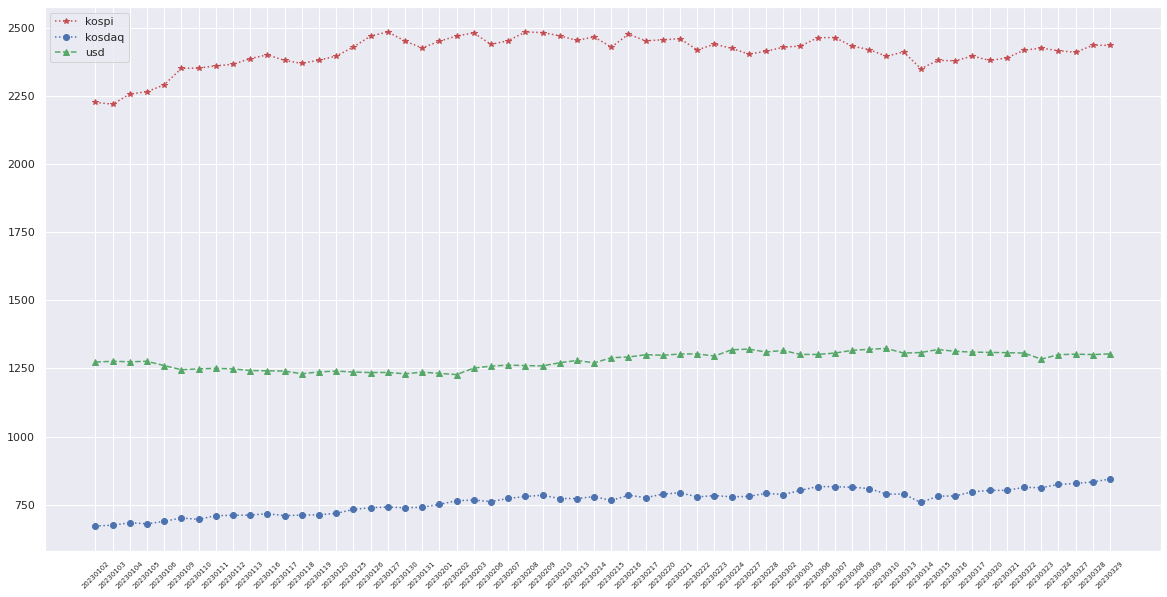

In [26]:
plt.figure(figsize=(20, 10))

plt.plot(kospi_df_0329["localDate"], kospi_df_0329["closePrice"], "r*:", label="kospi")
plt.plot(kosdaq_df_0329["localDate"], kosdaq_df_0329["closePrice"], "bo:", label="kosdaq")
plt.plot(usd_df_0329["localDate"], usd_df_0329["closePrice"], "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [27]:
# MinMax Scaling을 해주는 함수 사용하기
from sklearn.preprocessing import minmax_scale

minmax_scale(kospi_df_0329["closePrice"])

array([0.02634356, 0.        , 0.14057436, 0.17324942, 0.26867415,
       0.49562825, 0.49984925, 0.53082837, 0.55182031, 0.63092636,
       0.68282204, 0.60567574, 0.56395568, 0.60925605, 0.66548579,
       0.79102284, 0.94207432, 1.        , 0.87355845, 0.7778699 ,
       0.87103339, 0.94294113, 0.98635713, 0.82727821, 0.8782317 ,
       0.99856788, 0.99057813, 0.94614457, 0.88196276, 0.93073038,
       0.78849778, 0.96781488, 0.87634733, 0.89108314, 0.90555514,
       0.74998116, 0.83067008, 0.77232984, 0.69329916, 0.7317781 ,
       0.78830934, 0.80421346, 0.91934876, 0.92209995, 0.80361046,
       0.75529509, 0.66296073, 0.72329841, 0.49103038, 0.60691942,
       0.60009799, 0.66710635, 0.60495967, 0.63944373, 0.74726766,
       0.77560865, 0.73973016, 0.71809754, 0.81502977, 0.8146529 ])

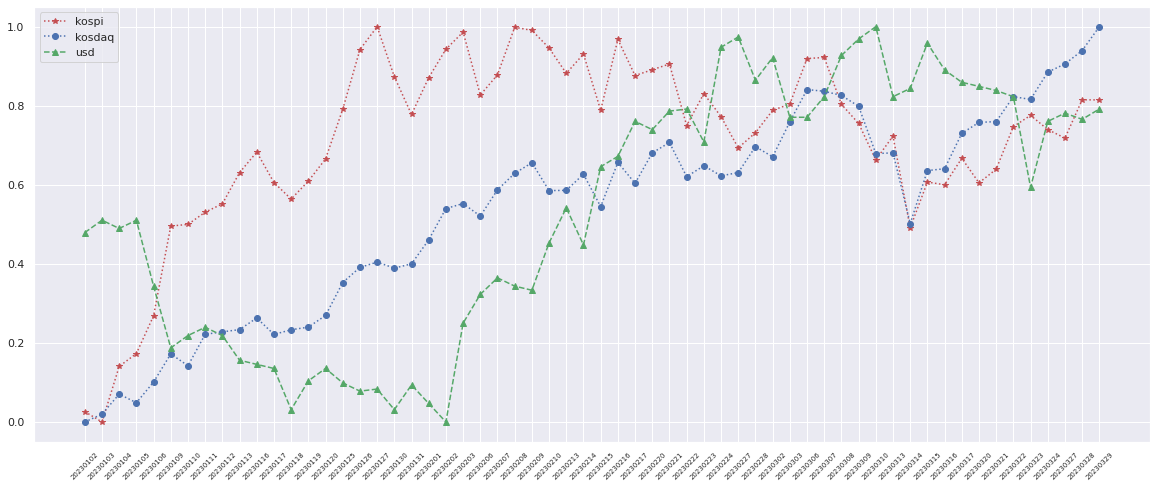

In [28]:
plt.figure(figsize=(20, 8))

plt.plot(kospi_df_0329["localDate"], minmax_scale(kospi_df_0329["closePrice"]), "r*:", label="kospi")
plt.plot(kosdaq_df_0329["localDate"],minmax_scale(kosdaq_df_0329["closePrice"]), "bo:", label="kosdaq")
plt.plot(usd_df_0329["localDate"],   minmax_scale(usd_df_0329["closePrice"]), "g^--", label="usd")
plt.xticks(rotation=45, fontsize=7)
plt.legend()
plt.show()

In [29]:
# 코스피, 코스닥, 미 환율 상관관계 확인
import numpy as np

# 코스피 : 코스닥 상관관계
np.corrcoef(kospi_df_0329["closePrice"], kosdaq_df_0329["closePrice"])[0, 1]

0.648698947974674

In [30]:
# 코스피 : 미 달러 환율 상관관계
np.corrcoef(kospi_df_0329["closePrice"], usd_df_0329["closePrice"])[0, 1]

0.012095583931858207